In [1]:
import pickle 
import pandas as pd
from plotnine import *
%matplotlib inline

/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
with open('results15112017.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()

,Problem,CrossOP,CrossPB,MutOP,MutPB,SelectionOP,FitMin,Div,run
0,Bench1,<class 'GA.makespan.OnePointCross'>,0.3,<class 'GA.makespan.RandomMutation'>,0.1,<class 'GA.selection.RouletteWheel'>,12012,0.724342,0
1,Bench1,<class 'GA.makespan.OnePointCross'>,0.3,<class 'GA.makespan.RandomMutation'>,0.1,<class 'GA.selection.RouletteWheel'>,11888,0.696431,1
2,Bench1,<class 'GA.makespan.OnePointCross'>,0.3,<class 'GA.makespan.RandomMutation'>,0.1,<class 'GA.selection.RouletteWheel'>,12531,0.863651,2
3,Bench1,<class 'GA.makespan.OnePointCross'>,0.3,<class 'GA.makespan.RandomMutation'>,0.1,<class 'GA.selection.RouletteWheel'>,10978,0.661880,3
4,Bench1,<class 'GA.makespan.OnePointCross'>,0.3,<class 'GA.makespan.RandomMutation'>,0.1,<class 'GA.selection.RouletteWheel'>,11698,0.731851,4


In [4]:
df.dtypes

Problem         object
CrossOP         object
CrossPB        float64
MutOP           object
MutPB          float64
SelectionOP     object
FitMin          object
Div            float64
run             object
dtype: object

In [10]:
mutation_ops = df['MutOP'].unique()
crossover_ops = df['CrossOP'].unique()
selection_ops = df['SelectionOP'].unique()
df['MutOP'] = pd.Categorical(df['MutOP'], categories=mutation_ops)
df.dtypes

Problem          object
CrossOP          object
CrossPB         float64
MutOP          category
MutPB           float64
SelectionOP      object
FitMin           object
Div             float64
run              object
dtype: object

In [11]:
df['CrossOP'] = df['CrossOP'].astype('category')
df['SelectionOP'] = df['SelectionOP'].astype('category')
df.dtypes

Problem          object
CrossOP        category
CrossPB         float64
MutOP          category
MutPB           float64
SelectionOP    category
FitMin           object
Div             float64
run              object
dtype: object

In [12]:
df['FitMin'] = df['FitMin'].astype('int')
df['run'] = df['run'].astype('int')
df.dtypes

Problem          object
CrossOP        category
CrossPB         float64
MutOP          category
MutPB           float64
SelectionOP    category
FitMin            int64
Div             float64
run               int64
dtype: object

In [17]:
df_agg = df.groupby(by=['Problem', 'CrossOP', 'MutOP', 'SelectionOP']).aggregate('mean')
df_agg

CrossPB  \
Problem CrossOP                             MutOP                                SelectionOP                                           
Bench1  <class 'GA.makespan.OnePointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
        <class 'GA.makespan.TwoPointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
Bench2  <class 'GA.makespan.OnePointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
        <class 'GA.makespan.TwoPointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
Bench3  <class 'GA.makespan.OnePointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
        <class 'GA.makespan.TwoPointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   
                                            <class 'GA.makespan.CreepMutation'>  <class 'GA.selection.RouletteWheel'>            0.3   
                                                                                 <class 'GA.selection.TournamentSelection'>      0.3   

                                                                                                                             MutPB  \
Problem CrossOP                             MutOP                                SelectionOP                                         
Bench1  <class 'GA.makespan.OnePointCross'> <class 'GA.makespan.RandomMutation'> <class 'GA.selection.RouletteWheel'>          0.1   
                                                                                 <class 'GA.selection.TournamentSelection'>    0.1   
                                            <class '

In [29]:
df_agg.reset_index(inplace=True)
df_agg

,Problem,CrossOP,MutOP,SelectionOP,CrossPB,MutPB,FitMin,Div,run
0,Bench1,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.RouletteWheel'>,0.3,0.1,11702.92,0.710689,49.5
1,Bench1,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.TournamentSelection'>,0.3,0.1,11267.00,0.560975,49.5
2,Bench1,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.CreepMutation'>,<class 'GA.selection.RouletteWheel'>,0.3,0.1,11471.40,0.672811,49.5
3,Bench1,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.CreepMutation'>,<class 'GA.selection.TournamentSelection'>,0.3,0.1,10958.89,0.510945,49.5
4,Bench1,<class 'GA.makespan.TwoPointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.RouletteWheel'>,0.3,0.1,11908.18,0.805474,49.5
5,Bench1,<class 'GA.makespan.TwoPointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.TournamentSelection'>,0.3,0.1,11518.15,0.640689,49.5
6,Bench1,<class 'GA.makespan.TwoPointCross'>,<class 'GA.makespan.CreepMutation'>,<class 'GA.selection.RouletteWheel'>,0.3,0.1,11783.98,0.772172,49.5
7,Bench1,<class 'GA.makespan.TwoPointCross'>,<class 'GA.makespan.CreepMutation'>,<class 'GA.selection.TournamentSelection'>,0.3,0.1,11369.59,0.605995,49.5
8,Bench2,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.RouletteWheel'>,0.3,0.1,14453.82,0.728134,49.5
9,Bench2,<class 'GA.makespan.OnePointCross'>,<class 'GA.makespan.RandomMutation'>,<class 'GA.selection.TournamentSelection'>,0.3,0.1,13865.38,0.555150,49.5


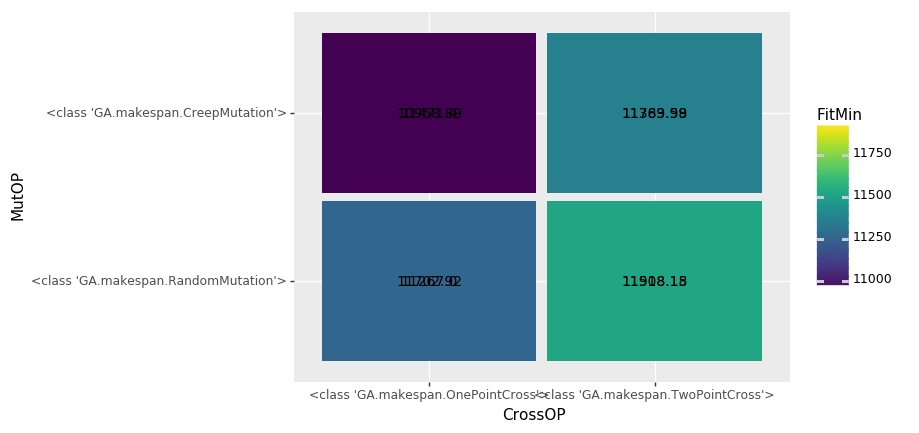

<ggplot: (8751953784552)>

In [32]:
(ggplot(df_agg[df_agg['Problem'] == 'Bench1'], aes('CrossOP', 'MutOP', fill='FitMin'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='FitMin'), size=10)
)

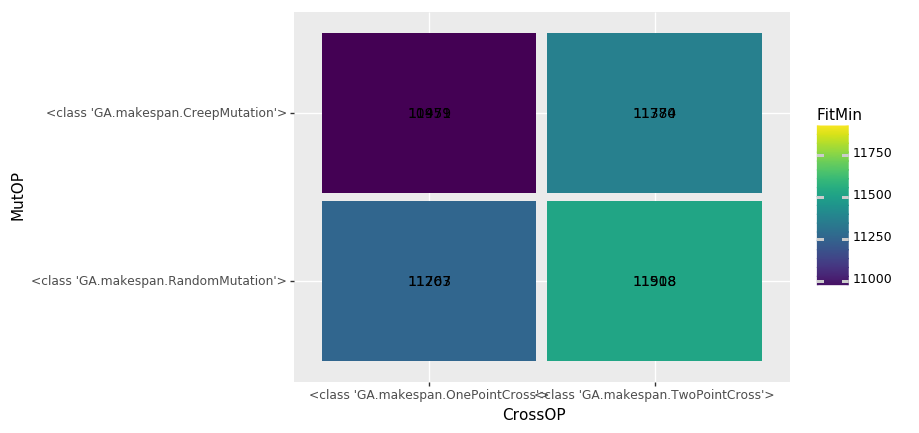

<ggplot: (-9223363284902230910)>

In [44]:
(ggplot(df_agg[df_agg['Problem'] == 'Bench1'], aes('CrossOP', 'MutOP', fill='FitMin'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='FitMin'), size=10, format_string='{:.0f}')
)

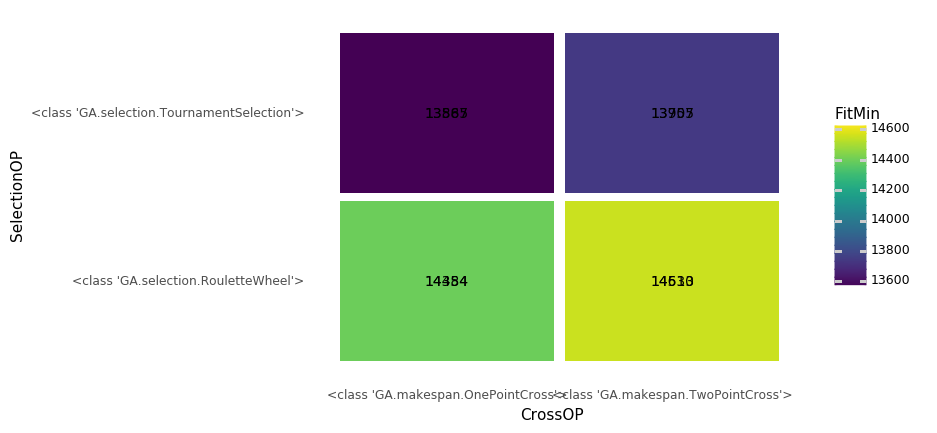

<ggplot: (8751952778802)>

In [114]:
(ggplot(df_agg[df_agg['Problem'] == 'Bench2'], aes('CrossOP','SelectionOP', shape='MutOP',fill='FitMin'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='FitMin'), size=10, format_string='{:.0f}')
 + theme(                                         # new
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)

In [115]:
for problem in ['Bench1', 'Bench2', 'Bench3']:
    (ggplot(df_agg[df_agg['Problem'] == problem], aes('CrossOP', 'MutOP', fill='FitMin'))
     + geom_tile(aes(width=.95, height=.95))
     + geom_text(aes(label='FitMin'), size=10, format_string='{:.0f}')
      + theme(                                         # new
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
    ).save(problem + 'cross_mut.png')

/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench1cross_mut.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench2cross_mut.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench3cross_mut.png
  warn('Filename: {}'.format(filename))


In [116]:
for problem in ['Bench1', 'Bench2', 'Bench3']:
    (ggplot(df_agg[df_agg['Problem'] == problem], aes('CrossOP', 'SelectionOP', fill='FitMin'))
     + geom_tile(aes(width=.95, height=.95))
     + geom_text(aes(label='FitMin'), size=10, format_string='{:.0f}')
      + theme(                                         # new
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
    ).save(problem + 'cross_sel.png')

/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench1cross_sel.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench2cross_sel.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench3cross_sel.png
  warn('Filename: {}'.format(filename))


In [117]:
for problem in ['Bench1', 'Bench2', 'Bench3']:
    (ggplot(df_agg[df_agg['Problem'] == problem], aes('MutOP', 'SelectionOP', fill='FitMin'))
     + geom_tile(aes(width=.95, height=.95))
     + geom_text(aes(label='FitMin'), size=10, format_string='{:.0f}')
      + theme(                                         # new
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
    ).save(problem + 'mut_sel.png')

/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench1mut_sel.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench2mut_sel.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench3mut_sel.png
  warn('Filename: {}'.format(filename))


In [111]:
for problem in ['Bench1', 'Bench2', 'Bench3']:
    (ggplot(df[df['Problem'] == problem], aes('MutOP', 'FitMin'))
     + geom_jitter(width=0.2)
     + geom_boxplot(aes(color='CrossOP'))
     + facet_wrap("~SelectionOP")
     + theme(axis_text_x=element_text(angle=25,hjust=1))
    ).save(problem + 'box.png')

/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench1box.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench2box.png
  warn('Filename: {}'.format(filename))
/home/jarno/.anaconda3/envs/playground/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: Bench3box.png
  warn('Filename: {}'.format(filename))
